## Pandas로 인구 구조 분석하기

### 데이터 읽어오기
- 전체 데이터를 총 인구수로 나누어 비율로 변환
- 총인구수와 연령구간 인구수를 삭제한다.

In [2]:
import pandas as pd
df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df = df.div(df['총인구수'], axis=0)
del df['총인구수'], df['연령구간인구수']
df.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,...,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,...,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,...,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,...,0.001461,0.000522,0.001252,0.000626,0.000522,0.000835,0.000209,0.000522,0.000417,0.001774
서울특별시 종로구 삼청동(1111054000),0.003191,0.005319,0.001064,0.007447,0.003901,0.004610,0.003191,0.005674,0.004965,0.008865,...,0.002128,0.002128,0.000355,0.001064,0.000000,0.001064,0.000355,0.000000,0.000709,0.002482


### 궁금한 지역의 이름을 입력받고 해당 지역의 인구 구조 저장하기

In [3]:
name = input('궁금한 지역의 이름을 입력하세요 : ')
a = df.index.str.contains(name)  # 인덱스 문자열에 원하는 문자열이 포함된 행을 찾아 해당 지역 인구 구조를 저장
df2 = df[a]
df2

궁금한 지역의 이름을 입력하세요 : 신도림동


,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.008747,0.008962,0.010894,0.011082,0.010438,0.010948,0.011189,0.011645,0.011028,0.010384,...,0.000402,0.000349,0.000322,0.000134,0.000215,0.000134,0.000107,0.000054,0.00008,0.000188


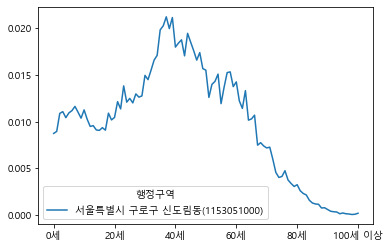

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
df2.T.plot()  # x축이 나이가 되도록 전치행렬로 바꿈 ( 행, 열 기준으로 그래프 그려짐 )
plt.show()

### 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역 시각화하기

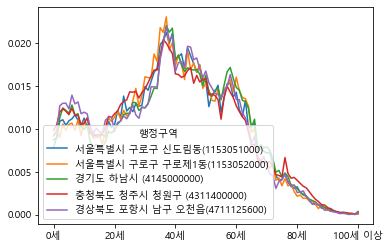

In [5]:
import numpy as np
# 궁금한 지역 a의 인구 비율에서 b 인구 비율을 뺀다
x = df.sub(df2.iloc[0], axis=1)
# a의 인구 비율에서 b 인구 비율을 뺀 값의 제곱 값을 모두 더한다
y = np.power(x, 2)
z = y.sum(axis=1)
# 차이가 작은 지역 5곳 
i = z.sort_values().index[:5]
df.loc[i].T.plot()
plt.show()

#### 한줄 코드

In [ ]:
df.loc[np.power(df.sub(df2.iloc[0], axis=1), 2).sum(axis=1).sort_values().index[:5]].T.plot()

## 최종 코드

궁금한 지역의 이름을 입력하세요 : 원효로제1동


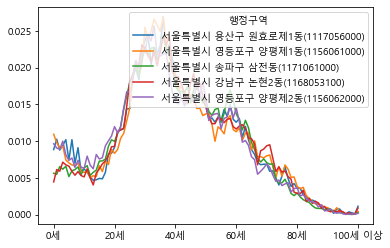

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df = df.div(df['총인구수'], axis=0)
del df['총인구수'], df['연령구간인구수']

name = input('궁금한 지역의 이름을 입력하세요 : ')
a = df.index.str.contains(name)
df2 = df[a]

df.loc[np.power(df.sub(df2.iloc[0], axis=1), 2).sum(axis=1).sort_values().index[:5]].T.plot()
plt.show()